## PCA Principal Component Analysis

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sütun isimlerini tanımlayın
column_names = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]

# Dosyayı okuyun
df = pd.read_csv(
    "C:/Users/hp/OneDrive/Masaüstü/Anlaşılır ekonomi/pca_iris.data",
    header=None,  # Dosyada başlık yok
    names=column_names,  # Sütun isimlerini belirleyin
    sep=","  # Veriler virgülle ayrılmış
)

# Veriyi kontrol edin
print(df)


     SepalLength  SepalWidth  PetalLength  PetalWidth         Species
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


In [24]:

features=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]
x=df[features]
y=df[['Species']]

## STANDARD SCALER YAPIYORUZ

In [25]:
x= StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [29]:
pca = PCA(n_components=2)
principalComponents =pca.fit_transform(x)
principalDF = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2'])
principalDF

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


## Şimdi en son Species sütunumuzu  da PCA DataFrame'imizin sonuna ekleyelim

In [31]:
final_dataFrame= pd.concat([principalDF,df[['Species']]], axis=1)

In [32]:
final_dataFrame.head()

,principal component 1,principal component 2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


## Son olarak da final dataframe'imizi görselleştirelim

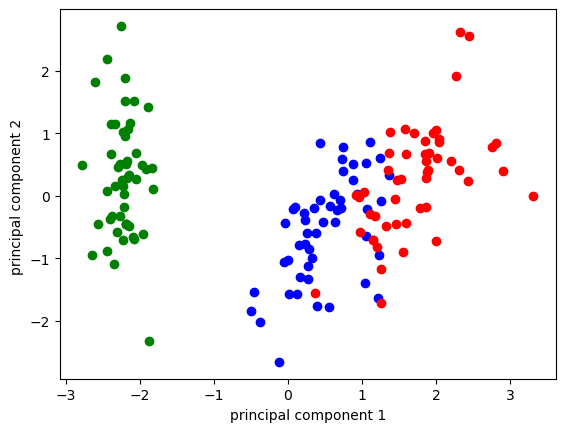

In [40]:
targets =['Iris-setosa','Iris-versicolor','Iris-virginica']
colors=['g','b','r']

plt.xlabel('principal component 1')
plt.ylabel('principal component 2 ')

for Species, col in zip(targets, colors):
    dftemp=final_dataFrame[df.Species==Species]
    plt.scatter(dftemp['principal component 1'], dftemp['principal component 2'],color=col)

## veri setimizi ne kadar koruduk

In [43]:
pca.explained_variance_ratio_.sum()

0.95800975361482